# load and clean data

In [1]:
## DATA PREPROCESSING with larger and more specific stop_list
# Importing modules
import pandas as pd
import numpy as np
import os
import re
import nltk
from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

stop_list = nltk.corpus.stopwords.words('english')
# The following list is to further remove some frequent words 
# stop_list += ['would', 'said', 'say', 'year', 'day', 'also', 'first', 'last', 'one', 'two', 'told',
#               'three', 'since', 'nft', 'metaverse','fashion','amp', 
#               'project','nfts', 'eyesoffashion', "im", "u", "even", "shes", "id", "thing", "still", "one","things",
#                "going","ive","got","get","around","else", "back","go","always"]
stop_list += ["thank","do","doing","does","good", "thankyou", "thanks", "get","gets","getting","cool","check","follow",
             "drop","drops","dropping","comment", "also", "great", "go","going","goes", "let", "really",
              "much","well","use",
             'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# from nltk.stem.porter import *
# stemmer = PorterStemmer()

def clean_post(reddit):
    if type(reddit) == float:
        return ""
    
    temp = reddit.lower()
#     temp = re.sub("'", "", temp) # to avoid removing contractions in english
#     temp = re.sub("@[A-Za-z0-9_]+","", temp)
#     temp = re.sub("#[A-Za-z0-9_]+","", temp)
#     temp = re.sub(r'http\S+', '', temp)
#     temp = re.sub('[()!?]', ' ', temp)
#     temp = re.sub('\[.*?\]',' ', temp)
#     temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_list]
    #temp = [stemmer.stem(w) for w in temp]
    temp = " ".join(word for word in temp)
    return temp

In [57]:
reddit_rows_csv = pd.read_csv('merged_clean.csv', lineterminator='\n')
reddit_text_list = reddit_rows_csv["Processed\r"].tolist()
reddit_results_df = pd.DataFrame()

for x in range(len(reddit_text_list)):
#     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
    dict = {'Processed': clean_post(reddit_text_list[x])}
    reddit_results_df = reddit_results_df.append(dict, ignore_index = True)
# reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
results = reddit_results_df[reddit_results_df.Processed != '']
# print('done')

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

reddit_results_df

,Processed
0,cardano nft marketplace projects updated 2 9 2022added genesis house nftjam artano curated marketplace community curated high quality nft marketplace cardano cares sustainability inclusivity jpg store marketplace trade nfts instantly discover artwork explore communities support artists cardano cnft io marketplace digital cardano nft token platform lovada marketplace inclusive marketplace cardano blockchain wholly benefitting supporting artist democratizing art market genesis house marketplac...
1,im one co founders nft craze working nft marketplace nft backed defi goal enable artists easily launch entire collection wish working using smart contracts implement shared partial ownership nfts decentralised p2p loans using nfts collateral would allow users earn higher apy lending loan interest paid deadline ownership full partial nft transferred lender youd like see find us soon launch presale first collection acting funding round build described youd like see happen please help us spread...
2,needs tokhun io list
3,hey im founder working expanding platform full blown decentralized marketplace
4,running mostly single mint nfts
...,...
87470,free cats solana nft everyone worth 30 000 upvote sol wallet comments
87471,additional details guarantee win make sure steps twitter pinned tweet join discord luck
87472,claim free nifty records nft joining discord
87473,3 free nft giveaway upvote address


In [ ]:
pd.set_option("display.max_rows", None)
reddit_results_df["Processed"].value_counts()

In [58]:
results = pd.concat([reddit_rows_csv[["subreddit","id","submission","p or c\r"]],reddit_results_df],axis=1)
#merged4.to_csv("merged_cropped_processed_topicmodelling.csv",index= False)
results

,subreddit,id,submission,p or c\r,Processed
0,CardanoNFTs,mnko80,mnko80,post\r,cardano nft marketplace projects updated 2 9 2022added genesis house nftjam artano curated marketplace community curated high quality nft marketplace cardano cares sustainability inclusivity jpg store marketplace trade nfts instantly discover artwork explore communities support artists cardano cnft io marketplace digital cardano nft token platform lovada marketplace inclusive marketplace cardano blockchain wholly benefitting supporting artist democratizing art market genesis house marketplac...
1,CardanoNFTs,gtyvi7w,mnko80,comment\r,im one co founders nft craze working nft marketplace nft backed defi goal enable artists easily launch entire collection wish working using smart contracts implement shared partial ownership nfts decentralised p2p loans using nfts collateral would allow users earn higher apy lending loan interest paid deadline ownership full partial nft transferred lender youd like see find us soon launch presale first collection acting funding round build described youd like see happen please help us spread...
2,CardanoNFTs,hb9geeo,mnko80,comment\r,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment\r,hey im founder working expanding platform full blown decentralized marketplace
4,CardanoNFTs,gw0807w,mnko80,comment\r,running mostly single mint nfts
...,...,...,...,...,...
87470,SolanaNFTs,t3d3ej,t3d3ej,post\r,free cats solana nft everyone worth 30 000 upvote sol wallet comments
87471,SolanaNFTs,hyrjnqm,t3d3ej,comment\r,additional details guarantee win make sure steps twitter pinned tweet join discord luck
87472,SolanaNFTs,se2vdl,se2vdl,post\r,claim free nifty records nft joining discord
87473,SolanaNFTs,r8n97m,r8n97m,post\r,3 free nft giveaway upvote address


In [97]:
# results_to_lemm = results["Processed"].tolist()
# results_to_lemm

['cardano nft marketplace projects updated 2 9 2022added genesis house nftjam artano curated marketplace community curated high quality nft marketplace cardano cares sustainability inclusivity jpg store marketplace trade nfts instantly discover artwork explore communities support artists cardano cnft io marketplace digital cardano nft token platform lovada marketplace inclusive marketplace cardano blockchain wholly benefitting supporting artist democratizing art market genesis house marketplace ada nft marketplace backs creators genesis house marketplace ada nft marketplace backs creators nft craze goal enable artists easily launch entire collection wish working using smart contracts implement shared partial ownership nfts decentralised p2p loans using nfts collateral nft dao marketplace unstoppable self organizing collective building rapid nft marketplace generation dapp cardano telegram nft dao somint marketplace art 3 0 fresh approach passion comes first nft art marketplace',
 'im o

In [98]:
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

In [99]:
# reddit_results_lemmed = pd.DataFrame()

# for x in range(len(results_to_lemm)):
# #     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
#     dict = {'Lemmed': lemmatization(results_to_lemm[x],allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])}
#     reddit_results_lemmed = reddit_results_lemmed.append(dict, ignore_index = True)
# # reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
# reddit_results_lemmed

,Lemmed
0,"[[], [], [r], [], [], [], [], [], [], [], [t],..."
1,"[[], [m], [], [], [], [], [], [], [], [], [], ..."
2,"[[], [], [], [], [s], [], [t], [], [k], [h], [..."
3,"[[h], [], [], [], [], [m], [], [], [], [u], []..."
4,"[[r], [u], [], [], [], [], [], [], [m], [], [s..."
...,...
87470,"[[], [r], [], [], [], [], [], [t], [s], [], [s..."
87471,"[[], [], [], [], [t], [], [], [], [], [l], [],..."
87472,"[[], [l], [], [], [m], [], [], [r], [], [], []..."
87473,"[[], [], [], [r], [], [], [], [], [], [t], [],..."


In [70]:
results.to_csv("merged_clean_tm.csv",index= False)


In [3]:
results = pd.read_csv('merged_clean_tm.csv', lineterminator='\n')
r_list = results.values.tolist()
for i in r_list:
    i[3]=i[3].rstrip("\r")
    i[4]=i[4].rstrip("\r")
results = pd.DataFrame(r_list, columns = ['subreddit', 'id', 'submission', 'p or c', 'Processed'])
results

,subreddit,id,submission,p or c,Processed
0,CardanoNFTs,mnko80,mnko80,post,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment,im one co founders nft craze working nft marke...
2,CardanoNFTs,hb9geeo,mnko80,comment,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment,hey im founder working expanding platform full...
4,CardanoNFTs,gw0807w,mnko80,comment,running mostly single mint nfts
...,...,...,...,...,...
87470,SolanaNFTs,t3d3ej,t3d3ej,post,free cats solana nft everyone worth 30 000 upv...
87471,SolanaNFTs,hyrjnqm,t3d3ej,comment,additional details guarantee win make sure ste...
87472,SolanaNFTs,se2vdl,se2vdl,post,claim free nifty records nft joining discord
87473,SolanaNFTs,r8n97m,r8n97m,post,3 free nft giveaway upvote address


In [4]:
results

,subreddit,id,submission,p or c,Processed
0,CardanoNFTs,mnko80,mnko80,post,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment,im one co founders nft craze working nft marke...
2,CardanoNFTs,hb9geeo,mnko80,comment,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment,hey im founder working expanding platform full...
4,CardanoNFTs,gw0807w,mnko80,comment,running mostly single mint nfts
...,...,...,...,...,...
87470,SolanaNFTs,t3d3ej,t3d3ej,post,free cats solana nft everyone worth 30 000 upv...
87471,SolanaNFTs,hyrjnqm,t3d3ej,comment,additional details guarantee win make sure ste...
87472,SolanaNFTs,se2vdl,se2vdl,post,claim free nifty records nft joining discord
87473,SolanaNFTs,r8n97m,r8n97m,post,3 free nft giveaway upvote address


In [5]:
# results["Processed\r"].value_counts()

In [7]:
from nltk import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

tokenizer = RegexpTokenizer(r'\w+')
porter_stemmer = PorterStemmer()

reddit_words = []
for reddit_text in results['Processed']:
    tokens = tokenizer.tokenize(reddit_text)
    reddit_words.append(tokens)

print(len(reddit_words))

reddit_stemmed = []
for tokenized in reddit_words:
    temp = []
    for w in tokenized:
        temp.append(porter_stemmer.stem(w))
    
    reddit_stemmed.append(temp)
    
print(len(reddit_stemmed))

87475
87475


# LDA topic modelling 2

In [8]:
# !pip3 install pyLDAvis

In [9]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import pyLDAvis.gensim_models as gensimvis

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [10]:
gensim.__version__

'4.1.2'

# Reddit Data

In [11]:
# Build the bigram and trigram models
reddit_bigram = gensim.models.Phrases(reddit_words, min_count=5, threshold=100) # higher threshold fewer phrases.
reddit_trigram = gensim.models.Phrases(reddit_bigram[reddit_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
reddit_bigram_mod = gensim.models.phrases.Phraser(reddit_bigram)
reddit_trigram_mod = gensim.models.phrases.Phraser(reddit_trigram)

# See trigram example
print(reddit_trigram_mod[reddit_bigram_mod[reddit_words[0]]])

['cardano', 'nft', 'marketplace', 'projects', 'updated', '2', '9', '2022added', 'genesis', 'house', 'nftjam', 'artano', 'curated', 'marketplace', 'community', 'curated', 'high_quality', 'nft', 'marketplace', 'cardano', 'cares', 'sustainability', 'inclusivity', 'jpg_store', 'marketplace', 'trade', 'nfts', 'instantly', 'discover', 'artwork', 'explore', 'communities', 'support', 'artists', 'cardano', 'cnft_io', 'marketplace', 'digital', 'cardano', 'nft', 'token', 'platform', 'lovada', 'marketplace', 'inclusive', 'marketplace', 'cardano', 'blockchain', 'wholly', 'benefitting', 'supporting', 'artist', 'democratizing', 'art', 'market', 'genesis', 'house', 'marketplace', 'ada', 'nft', 'marketplace', 'backs', 'creators', 'genesis', 'house', 'marketplace', 'ada', 'nft', 'marketplace', 'backs', 'creators', 'nft', 'craze', 'goal', 'enable', 'artists', 'easily', 'launch', 'entire', 'collection', 'wish', 'working', 'using', 'smart_contracts', 'implement', 'shared', 'partial', 'ownership', 'nfts', '

In [12]:
def make_bigrams(texts):
    return [reddit_bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [reddit_trigram_mod[reddit_bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_list] for doc in texts_out]    
    return texts_out

In [13]:
# Form Bigrams
reddit_bigrams = make_bigrams(reddit_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
reddit_lemmatized = lemmatization(reddit_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(reddit_lemmatized[:1])

[['project', 'update', 'adde', 'genesis', 'curate', 'marketplace', 'community', 'curate', 'high_quality', 'care', 'jpg_store', 'marketplace', 'trade', 'nft', 'instantly', 'discover', 'artwork', 'explore', 'community', 'support', 'artist', 'token', 'platform', 'marketplace', 'wholly', 'benefit', 'support', 'artist', 'democratize', 'art', 'market', 'genesis', 'marketplace', 'back', 'creator', 'genesis', 'marketplace', 'back', 'creator', 'craze', 'goal', 'enable', 'artist', 'easily', 'launch', 'entire', 'collection', 'wish', 'work', 'smart_contract', 'implement', 'share', 'partial', 'ownership', 'nft', 'decentralise', 'loan', 'nft', 'dao', 'marketplace', 'unstoppable', 'self', 'organize', 'collective', 'building', 'rapid', 'dao', 'somint', 'marketplace', 'art', 'fresh', 'approach', 'passion', 'come', 'first', 'art', 'marketplace']]


In [14]:
# Create Dictionary
reddit_id2word = corpora.Dictionary(reddit_lemmatized)

# Create Corpus
reddit_texts = reddit_lemmatized

# Term Document Frequency
reddit_corpus = [reddit_id2word.doc2bow(text) for text in reddit_texts]

# View
print(reddit_corpus[:1])

[[(0, 1), (1, 1), (2, 3), (3, 3), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 2), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 8), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)]]


In [15]:
#human readable version of corpus
[[(reddit_id2word[id], freq) for id, freq in cp] for cp in reddit_corpus[:1]]

[[('adde', 1),
  ('approach', 1),
  ('art', 3),
  ('artist', 3),
  ('artwork', 1),
  ('back', 2),
  ('benefit', 1),
  ('building', 1),
  ('care', 1),
  ('collection', 1),
  ('collective', 1),
  ('come', 1),
  ('community', 2),
  ('craze', 1),
  ('creator', 2),
  ('curate', 2),
  ('dao', 2),
  ('decentralise', 1),
  ('democratize', 1),
  ('discover', 1),
  ('easily', 1),
  ('enable', 1),
  ('entire', 1),
  ('explore', 1),
  ('first', 1),
  ('fresh', 1),
  ('genesis', 3),
  ('goal', 1),
  ('high_quality', 1),
  ('implement', 1),
  ('instantly', 1),
  ('jpg_store', 1),
  ('launch', 1),
  ('loan', 1),
  ('market', 1),
  ('marketplace', 8),
  ('nft', 3),
  ('organize', 1),
  ('ownership', 1),
  ('partial', 1),
  ('passion', 1),
  ('platform', 1),
  ('project', 1),
  ('rapid', 1),
  ('self', 1),
  ('share', 1),
  ('smart_contract', 1),
  ('somint', 1),
  ('support', 2),
  ('token', 1),
  ('trade', 1),
  ('unstoppable', 1),
  ('update', 1),
  ('wholly', 1),
  ('wish', 1),
  ('work', 1)]]

# reddit LDA topics

In [16]:
from imp import reload

In [17]:
reddit_topics = []
reddit_perplexity_score = []
reddit_coherence_score = []
reddit_vis = []
reddit_lda_model_list = []

for i in range(3,4):
    reddit_lda_model = gensim.models.ldamodel.LdaModel(corpus=reddit_corpus,
                                           id2word=reddit_id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    print(type(reddit_lda_model))
    reddit_topics.append(reddit_lda_model.show_topics(num_topics=i,num_words=30))
    
    reddit_perplexity_score.append(reddit_lda_model.log_perplexity(reddit_corpus))
    print('\nPerplexity: ', reddit_perplexity_score[i-3])  # a measure of how good the model is. lower the better.
    
    coherence_model_lda = CoherenceModel(model=reddit_lda_model, texts=reddit_lemmatized, dictionary=reddit_id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    reddit_coherence_score.append(coherence_lda)
    print('\nCoherence Score: ', coherence_lda)
    
    pyLDAvis.enable_notebook()
    vis_i = pyLDAvis.gensim_models.prepare(reddit_lda_model, reddit_corpus, reddit_id2word)
    reddit_vis.append(vis_i)
    reddit_lda_model_list.append(reddit_lda_model)
    
print(type(reddit_lda_model_list[0]))

<class 'gensim.models.ldamodel.LdaModel'>

Perplexity:  -8.288843307370582

Coherence Score:  0.5393346182174308


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/past/builtins/misc.py:45: Deprec

<class 'gensim.models.ldamodel.LdaModel'>


In [18]:
reddit_topics

[[(0,
   '0.042*"mint" + 0.033*"nft" + 0.029*"project" + 0.023*"first" + 0.020*"art" + 0.019*"collection" + 0.017*"amazing" + 0.015*"want" + 0.014*"new" + 0.013*"free" + 0.011*"community" + 0.011*"sell" + 0.010*"official" + 0.010*"help" + 0.009*"eth" + 0.009*"live" + 0.008*"platform" + 0.008*"come" + 0.008*"artist" + 0.007*"give" + 0.007*"game" + 0.007*"blockchain" + 0.007*"miss" + 0.007*"find" + 0.006*"marketplace" + 0.006*"receive" + 0.006*"price" + 0.006*"buy" + 0.006*"solana" + 0.006*"launch"'),
  (1,
   '0.059*"wallet" + 0.016*"make" + 0.015*"opensea" + 0.013*"see" + 0.011*"rarible" + 0.010*"simply" + 0.010*"user" + 0.009*"keep" + 0.008*"future" + 0.008*"sure" + 0.007*"pay" + 0.007*"worth" + 0.007*"need" + 0.007*"day" + 0.006*"know" + 0.006*"lot" + 0.006*"cost" + 0.006*"money" + 0.006*"think" + 0.006*"people" + 0.006*"slope" + 0.006*"take" + 0.006*"already" + 0.005*"fee" + 0.005*"market" + 0.005*"even" + 0.005*"gas_fee" + 0.005*"thing" + 0.005*"provide" + 0.005*"still"'),
  (2,
  

In [19]:
# import matplotlib.pyplot as plt

# limit=2+len(reddit_perplexity_score); start=2; step=1;
# x = range(start, limit, step)
# plt.plot(x, reddit_perplexity_score,label='perplexity')
# plt.xlabel("Num Topics")
# plt.ylabel("perplexity score")
# plt.legend(("perplexity_values"), loc='best')
# plt.show()

In [20]:
# # MEDIA COHERENCE SCORE 
# limit=2+len(reddit_coherence_score); start=3; step=1;
# x = range(start, limit, step)
# plt.plot(x, reddit_coherence_score,label='coherence')
# plt.xlabel("Num Topics")
# plt.ylabel("coherence score")
# plt.legend(("coherence"), loc='best')
# plt.show()

What does perplexity and Coherance Score tell us?<br> 
- Perplexity: Calculate the held out log-likelihood
- Coherence: Calculate the conditional likelihood of co-occurrence
The perplexity metric is a predictive one. It assesses a topic model’s ability to predict a test set after having been trained on a training set. But does not tell us if its coherant. As the perplexity score improves (ie. the held out log-likelihood is higher), the human interpretability of topics get worse (rather than better).<br>



In [21]:
reddit_vis[0]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.198125  0.247151       1        1  37.340617
1     -0.136827 -0.279263       2        1  34.737610
2      0.334953  0.032112       3        1  27.921773, topic_info=        Term          Freq         Total Category  logprob  loglift
141  discord  12119.000000  12119.000000  Default  30.0000  30.0000
145     join   8953.000000   8953.000000  Default  29.0000  29.0000
354   wallet  10001.000000  10001.000000  Default  28.0000  28.0000
115  twitter   6214.000000   6214.000000  Default  27.0000  27.0000
90      mint   7676.000000   7676.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
413     dope    955.637101    957.884229   Topic3  -4.9600   1.2734
248     post   1267.275726   1270.394429   Topic3  -4.6777   1.2733
402   friend    745.693872    747.901618   Topic3  -5.2080   1.2728
519   verify    742.959189    765.170365   Topic3  -5.2117   1.2463
728     free   1480.432134   3842.756276   Topic3  -4.5223   0.3219

[140 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
752       1  0.000313  address
752       2  0.000313  address
752       3  0.999733  address
181       1  0.001044  already
181       2  0.999349  already
...     ...       ...      ...
507       1  0.000829    worth
507       2  0.998404    worth
507       3  0.000829    worth
654       1  0.001481     year
654       2  0.998202     year

[236 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [22]:
for i in range(len(reddit_vis)):
    name = "reddit_lda_"+str(i)+".html"
    pyLDAvis.save_html(reddit_vis[i],name)

In [23]:
topic_1 = []
topic_1_string = ''

topic_2 = []
topic_2_string = ''

topic_3 = []
topic_3_string = ''

check1 = reddit_topics[0][0][1].split("\"")
check1 = [s.rstrip("*").lstrip(" + ") for s in check1]

check2 = reddit_topics[0][1][1].split("\"")
check2 = [s.rstrip("*").lstrip(" + ") for s in check2]

check3 = reddit_topics[0][2][1].split("\"")
check3 = [s.rstrip("*").lstrip(" + ") for s in check3]

In [24]:
check2

['0.059',
 'wallet',
 '0.016',
 'make',
 '0.015',
 'opensea',
 '0.013',
 'see',
 '0.011',
 'rarible',
 '0.010',
 'simply',
 '0.010',
 'user',
 '0.009',
 'keep',
 '0.008',
 'future',
 '0.008',
 'sure',
 '0.007',
 'pay',
 '0.007',
 'worth',
 '0.007',
 'need',
 '0.007',
 'day',
 '0.006',
 'know',
 '0.006',
 'lot',
 '0.006',
 'cost',
 '0.006',
 'money',
 '0.006',
 'think',
 '0.006',
 'people',
 '0.006',
 'slope',
 '0.006',
 'take',
 '0.006',
 'already',
 '0.005',
 'fee',
 '0.005',
 'market',
 '0.005',
 'even',
 '0.005',
 'gas_fee',
 '0.005',
 'thing',
 '0.005',
 'provide',
 '0.005',
 'still',
 '']

In [25]:
for i in range(30):
    topic_1.append((check1[(i*2)+1],check1[i*2]))
    topic_1_string += check1[(i*2)+1]
    topic_1_string += " "
    
    topic_2.append((check2[(i*2)+1],check2[i*2]))
    topic_2_string += check2[(i*2)+1]
    topic_2_string += " "
    
    topic_3.append((check3[(i*2)+1],check3[i*2]))
    topic_3_string += check3[(i*2)+1]
    topic_3_string += " "

In [26]:
print("Topic 1: ",topic_1_string)
print(" ")
print("Topic 2: ",topic_2_string)
print(" ")
print("Topic 3: ",topic_3_string)
print(" ")

Topic 1:  mint nft project first art collection amazing want new free community sell official help eth live platform come artist give game blockchain miss find marketplace receive price buy solana launch 
 
Topic 2:  wallet make opensea see rarible simply user keep future sure pay worth need day know lot cost money think people slope take already fee market even gas_fee thing provide still 
 
Topic 3:  discord join twitter love giveaway work look address nice win awesome link sol luck upvoted upvote hope server send free like post guy dope name friend verify super happy man 
 


In [27]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(reddit_lda_model_list[0], reddit_corpus, reddit_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/var/folders/39/d8tcqgqj7mv7xyp9q2m1m3x80000gn/T/ipykernel_3545/3191125887.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/39/d8tcqgqj7mv7xyp9q2m1m3x80000gn/T/ipykernel_3545/3191125887.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.7647,"mint, nft, project, first, art, collection, am...","[project, update, adde, genesis, curate, marke..."
1,1,1,0.4764,"wallet, make, opensea, see, rarible, simply, u...","[co, founder, craze, work, back, defi, goal, e..."
2,2,0,0.3516,"mint, nft, project, first, art, collection, am...","[need, tokhun_io, list]"
3,3,0,0.4037,"mint, nft, project, first, art, collection, am...","[founder, work, expand, platform, full, blow, ..."
4,4,0,0.3796,"mint, nft, project, first, art, collection, am...","[run, mostly, single, mint, nft]"
5,5,1,0.6019,"wallet, make, opensea, see, rarible, simply, u...","[gamifie, allow, human, collect, trade, audiob..."
6,6,0,0.4237,"mint, nft, project, first, art, collection, am...","[like, mint, digital]"
7,7,0,0.6323,"mint, nft, project, first, art, collection, am...","[add, beta, artist, able, list, sale, open, pu..."
8,8,2,0.5602,"discord, join, twitter, love, giveaway, work, ...","[somint, twitter, link, point, reddit]"
9,9,0,0.5636,"mint, nft, project, first, art, collection, am...","[digital, trading_card, metaverse, asset, proj..."


In [28]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.7647,"mint, nft, project, first, art, collection, am...","[project, update, adde, genesis, curate, marke..."
1,1,1,0.4764,"wallet, make, opensea, see, rarible, simply, u...","[co, founder, craze, work, back, defi, goal, e..."
2,2,0,0.3516,"mint, nft, project, first, art, collection, am...","[need, tokhun_io, list]"
3,3,0,0.4037,"mint, nft, project, first, art, collection, am...","[founder, work, expand, platform, full, blow, ..."
4,4,0,0.3796,"mint, nft, project, first, art, collection, am...","[run, mostly, single, mint, nft]"
...,...,...,...,...,...
87470,87470,2,0.4333,"discord, join, twitter, love, giveaway, work, ...","[free, nft, worth, upvote, sol, wallet]"
87471,87471,2,0.5278,"discord, join, twitter, love, giveaway, work, ...","[guarantee, win, make, sure, step, twitter, pi..."
87472,87472,2,0.5516,"discord, join, twitter, love, giveaway, work, ...","[claim, free, record, join, discord]"
87473,87473,2,0.6286,"discord, join, twitter, love, giveaway, work, ...","[free, giveaway, upvote, address]"


In [29]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 500

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(10)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.8668,"mint, nft, project, first, art, collection, amazing, want, new, free","[worlds_larg, adult, nft, marketplace, amouranth, auction, sell, stormy, daniel, auction, adult, nft, sell, month, largest_adult, marketplace, stormy_daniel, onlypunk, auction, sell, unique, nft, sell, month, th, xxxnifty_world, largest_adult, token, launch, nft, sell, date, low_marketcap, team, growth_expande, ambassador, crypto, nft, tech_rate, daily, token, business_doxxed, team, join]"
1,0,0.8653,"mint, nft, project, first, art, collection, amazing, want, new, free","[nft, project, grse, mint, live, introduce, new, gaming, experience, community, game, play, moon, project, base, land, moon, entirely, moon, divide, piece, acre_land, lands_owne, grse, mint, live, amazing, collection, nft, directly, website, holder, automatically, award, piece, land, metaverse, collection, net, include, head, nft, nft, nft, upcoming, roadmap, launch, moon, dashboard, platform, land, holder, grise, token, launch, release, different, character, moon, land, different, merging, ..."
2,0,0.8632,"mint, nft, project, first, art, collection, amazing, want, new, free","[onlypunk, amouranth, nft, sell, auction, w_trump, scandal_dress, onlypunk, partnership, major, stormy_daniel, auctioning_pre, trump_scandal, dress, unlockable, largest_adult, marketplace, stormy_daniel, onlypunk, auction, sell, unique, nft, sell, month, th, xxxnifty_world, largest_adult, token, launch, nft, sell, date, low_marketcap, team, growth_expande, ambassador, crypto, nft, tech_rate, daily, token, business_doxxed, team, join]"
3,0,0.8495,"mint, nft, project, first, art, collection, amazing, want, new, free","[charity, sale, rarible, shill, beautiful, partnership, reau, make, beautiful, animate, collection, rarible, sale, reau, charity, fund, directly, help, thousand, abandon, animal, shelter, ngo, goin, reaus, development, fund, artist, brief, introduction, project, base, token, focus, bring, native, blockchain, gaming, asset, rewarding, nft, developer, part, dogecoin, team, reau, newborn, token, aim, decentralize, financial, education, financial, support, animal, institution, month, reau, membe..."
4,0,0.8493,"mint, nft, project, first, art, collection, amazing, want, new, free","[come, soon, marketplace, artist, amas, night, tonight, fantastic, nft, artist, come, talk, community, first, tyler, reach, somewhat, celebrity, status, last, week, piece, buy, world, famous, come, second, guest, brand, new, artist, charty, base, artist, try, raise, support, farmer, world, fund, project, try, solve, famine, crisis, crazy_pig, come, pm_, password, crazy_pig, creators_wante, bring_attention, astrozero, gasless, nft, marketplace, design, help, benefit, new_seasone, artist, curr..."
5,0,0.8493,"mint, nft, project, first, art, collection, amazing, want, new, free","[come, soon, marketplace, artist, amas, night, tonight, fantastic, nft, artist, come, talk, community, first, tyler, reach, somewhat, celebrity, status, last, week, piece, buy, world, famous, come, second, guest, brand, new, artist, charty, base, artist, try, raise, support, farmer, world, fund, project, try, solve, famine, crisis, crazy_pig, come, pm_, password, crazy_pig, creators_wante, bring_attention, astrozero, gasless, nft, marketplace, design, help, benefit, new_seasone, artist, curr..."
6,0,0.8493,"mint, nft, project, first, art, collection, amazing, want, new, free","[come, soon, marketplace, artist, amas, night, tonight, fantastic, nft, artist, come, talk, community, first, tyler, reach, somewhat, celebrity, status, last, week, piece, buy, world, famous, come, second, guest, brand, new, artist, charty, base, artist, try, raise, support, farmer, world, fund, project, try, solve, famine, crisis, crazy_pig, come, pm_, password, crazy_pig, creators_wante, bring_attention, astrozero, gasless, nft, marketplace, design, help, benefit, new_seasone, artist, curr..."
7,0,0.8475,"mint, nft, 

In [30]:
avada_kedavra = pd.concat([results,df_dominant_topic], axis=1)
avada_kedavra

,subreddit,id,submission,p or c,Processed,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,CardanoNFTs,mnko80,mnko80,post,cardano nft marketplace projects updated 2 9 2022added genesis house nftjam artano curated marketplace community curated high quality nft marketplace cardano cares sustainability inclusivity jpg store marketplace trade nfts instantly discover artwork explore communities support artists cardano cnft io marketplace digital cardano nft token platform lovada marketplace inclusive marketplace cardano blockchain wholly benefitting supporting artist democratizing art market genesis house marketplac...,0,0,0.7647,"mint, nft, project, first, art, collection, amazing, want, new, free","[project, update, adde, genesis, curate, marketplace, community, curate, high_quality, care, jpg_store, marketplace, trade, nft, instantly, discover, artwork, explore, community, support, artist, token, platform, marketplace, wholly, benefit, support, artist, democratize, art, market, genesis, marketplace, back, creator, genesis, marketplace, back, creator, craze, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, ..."
1,CardanoNFTs,gtyvi7w,mnko80,comment,im one co founders nft craze working nft marketplace nft backed defi goal enable artists easily launch entire collection wish working using smart contracts implement shared partial ownership nfts decentralised p2p loans using nfts collateral would allow users earn higher apy lending loan interest paid deadline ownership full partial nft transferred lender youd like see find us well soon launch presale first collection acting funding round build described youd like see happen please help us s...,1,1,0.4764,"wallet, make, opensea, see, rarible, simply, user, keep, future, sure","[co, founder, craze, work, back, defi, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, decentralise, loan, nft, collateral, allow, user, earn, high, lending, loan, interest, pay, deadline, ownership, full, partial, transfer, lender, see, find, soon, launch, presale, first, act, funding, round, build, describe, see, happen, help, participate, collection, launch, week]"
2,CardanoNFTs,hb9geeo,mnko80,comment,needs tokhun io list,2,0,0.3516,"mint, nft, project, first, art, collection, amazing, want, new, free","[need, tokhun_io, list]"
3,CardanoNFTs,gy8awd2,mnko80,comment,hey im founder working expanding platform full blown decentralized marketplace,3,0,0.4037,"mint, nft, project, first, art, collection, amazing, want, new, free","[founder, work, expand, platform, full, blow, decentralized, marketplace]"
4,CardanoNFTs,gw0807w,mnko80,comment,running mostly single mint nfts,4,0,0.3796,"mint, nft, project, first, art, collection, amazing, want, new, free","[run, mostly, single, mint, nft]"
...,...,...,...,...,...,...,...,...,...,...
87470,SolanaNFTs,t3d3ej,t3d3ej,post,free cats solana nft everyone worth 30 000 upvote sol wallet comments,87470,2,0.4333,"discord, join, twitter, love, giveaway, work, look, address, nice, win","[free, nft, worth, upvote, sol, wallet]"
87471,SolanaNFTs,hyrjnqm,t3d3ej,comment,additional details guarantee win make sure steps twitter pinned tweet join discord luck,87471,2,0.5278,"discord, join, twitter, love, giveaway, work, look, address, nice, win","[guarantee, win, make, sure, step, twitter, pinned_tweet, join, discord, luck]"
87472,SolanaNFTs,se2vdl,se2vdl,post,claim free nifty records nft joining discord,87472,2,0.5516,"discord, join, twitter, love, giveaway, work, look, address, nice, win","[claim, free, record, join, discord]"
87473,SolanaNFTs,r8n97m,r8n97m,post,3 free nft giveaway upvote address,87473,2,0.6286,"discord, join, twitter, love, giveaway, work, look, address, nice, win","[free, giveaway, upvote, address]"


In [31]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 500

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = avada_kedavra.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=False).head(10)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet[["Dominant_Topic","Topic_Perc_Contrib","Processed","subreddit","p or c"]]

,Dominant_Topic,Topic_Perc_Contrib,Processed,subreddit,p or c
0,0,0.8668,xxxnifty november worlds largest adult nft marketplace partners onlypunks amouranth nft auction sold 125 000 stormy daniel nft auction 17 000 100 adult nfts sold month sold onlyfan xxxnifty amouranth onlypunks nft 125 000 using nsfw worlds largest adult nft marketplace stormy daniels onlypunks nft auction sold 17 000 100 unique 1 1 nfts sold month 10th xxxnifty worlds largest adult nft marketplace powered token pleasurely onlyfans replacement alpha launch 700 premium nfts sold date 100 appro...,CryptoArt,post
1,0,0.8653,one best nfts project grse nft minting live grise metamoonverse introducing new gaming experience community game played moon well project based land moon entirely moon divided 10 000 pieces 69 09 acre lands lands owned anyone grse nft minting live amazing collection nfts directly website nft holders automatically awarded piece land metaverse collection nets include head nfts trippy owl nfts moonland nfts upcoming roadmap launch moon dashboard platform land holders grise token launch cardano ...,CardanoNFTs,post
2,0,0.8632,xxxnifty onlypunk amouranth nft sold 125k auction stormy daniels w trump scandal dress onlypunk nft partnership major media coverage stormy daniels auctioning pres trump scandal dress nft unlockable sold onlyfan xxxnifty amouranth onlypunks nft 125 000 using nsfw worlds largest adult nft marketplace stormy daniels onlypunks nft auction sold 17 000 100 unique 1 1 nfts sold month 10th xxxnifty worlds largest adult nft marketplace powered token pleasurely onlyfans replacement alpha launch 700 p...,CryptoArt,post
3,0,0.8495,charity sale dogira reau nfts partnership rarible hi everyone im shill beautiful partnership two cryptodoggos reau dogira rootpew made 4 beautiful 3d animated nft collections rarible 0 25eth 84 sales going reau charity funds directly help thousands abandoned animals shelters ngos across latin america 6 goin reaus development funds 10 artist brief introduction projects dogira ethereum based token focused bringing native blockchain gaming asset rewarding nfts one developers part dogecoin team ...,Rarible,post
4,0,0.8493,coming soon astrozero gasless nft marketplace artist amas every night tonight two fantastic nft artists coming talk community first tyler downey creator crittlers tyler reached somewhat celebrity status last week one pieces bought world famous gary vee aka gary vaynerchuk coming tonight 830pm est second guest brand new artist crazy pigs crazy pigs charty based artist trying raise support farmers around world fund projects trying solve famine crisis crazy pigs coming 845pm est tyler downey cr...,NFTExchange,post
5,0,0.8493,coming soon astrozero gasless nft marketplace artist amas every night tonight two fantastic nft artists coming talk community first tyler downey creator crittlers tyler reached somewhat celebrity status last week one pieces bought world famous gary vee aka gary vaynerchuk coming tonight 830pm est second guest brand new artist crazy pigs crazy pigs charty based artist trying raise support farmers around world fund projects trying solve famine crisis crazy pigs coming 845pm est tyler downey cr...,CryptoArt,post
6,0,0.8493,coming soon astrozero gasless nft marketplace artist amas every night tonight two fantastic nft artists coming talk community first tyler downey creator crittlers tyler reached somewhat celebrity status last week one pieces bought world famous gary vee aka gary vaynerchuk coming tonight 830pm est second guest brand new artist crazy pigs crazy pigs charty based artist trying raise support farmers around world fund projects trying solve famine crisis crazy pigs coming 845pm est tyler downey cr...,Rarible,post
7,0,0.8475,coming soon astrozero gasless nft marketplace amas artists two live tonight tonight nft artists mydoom kantrell walton sharing community upcoming projects 830pm est hello creators wanted bring attention astrozero going released near future essen

IndexError: list index out of range

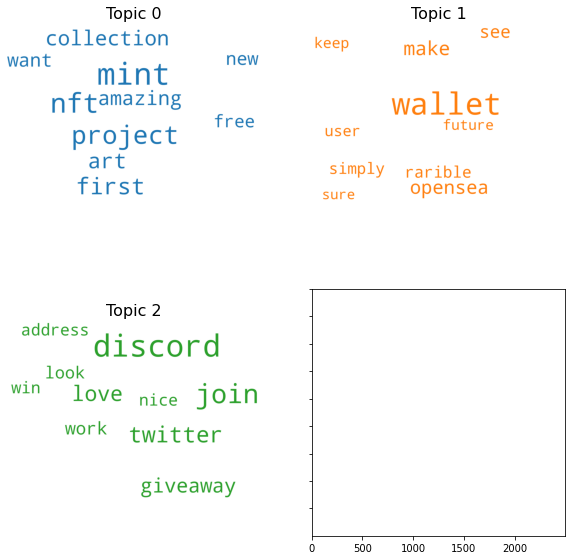

In [32]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_list,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = reddit_lda_model_list[0].show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()